In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

%matplotlib inline


In [371]:
!pip3 install scipy

In [ ]:
# hipotese: acidentes e incidentes são diferenciáveis pelo dataset.
# hipotese: a maioria dos acidentes ocorrem na região sudeste.
# hipotese: 

# Ler datasets

In [315]:
import seaborn as sns
# sns.set(rc={'figure.figsize':(10,8)})

In [316]:
raw_path = 'data/raw/'
inst_path = 'data/inst/'

In [414]:
aeronave = pd.read_parquet(inst_path + "aeronave.parquet")

In [415]:
fator_contrib = pd.read_parquet(inst_path + "fator_contrib.parquet")

In [416]:
ocorrencia = pd.read_parquet(inst_path + "ocorrencia.parquet")

In [417]:
ocorrencia_tipo = pd.read_parquet(inst_path + "ocorrencia_tipo.parquet")

# Aeronave

In [418]:
aeronave.head()

,codigo_ocorrencia2,aeronave_motor_tipo,aeronave_pais_fabricante,aeronave_ano_fabricacao,aeronave_tipo_operacao,aeronave_nivel_dano,tipo_acidente
0,39115,PISTÃO,BRASIL,1979.0,PRIVADA,SUBSTANCIAL,ACCIDENTE
1,39155,TURBOÉLICE,BRASIL,1979.0,PRIVADA,NENHUM,INCIDENTE
2,39156,TURBOÉLICE,BRASIL,2008.0,REGULAR,LEVE,INCIDENTE
3,39158,JATO,BRASIL,1984.0,REGULAR,NENHUM,INCIDENTE
4,39176,JATO,BRASIL,2001.0,REGULAR,NENHUM,INCIDENTE


In [419]:
aeronave['idade'] = 2021 -  aeronave['aeronave_ano_fabricacao']

## De onde foram fabricadas as aeronaves acidentadas ?

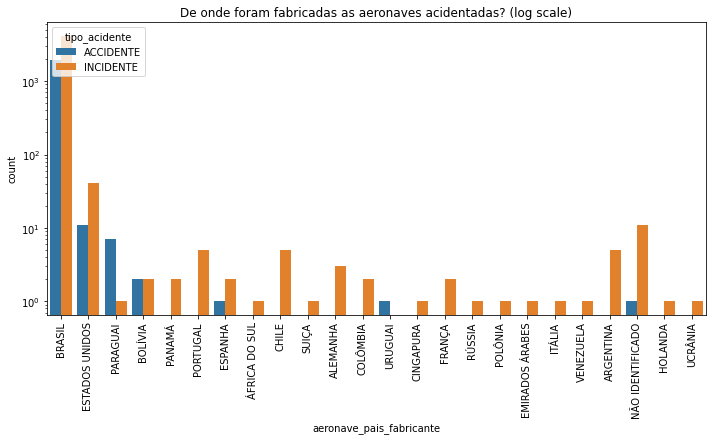

In [420]:
# aeronave.aeronave_pais_fabricante.value_counts().plot.bar()
plt.figure(figsize=(10,6))
chart = sns.countplot(x ='aeronave_pais_fabricante', data = aeronave, hue='tipo_acidente')

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_yscale("log")
plt.tight_layout()
plt.title("De onde foram fabricadas as aeronaves acidentadas? (log scale)")
plt.savefig("data/images/q01.png")

## Distribuição da variável aeronave_ano_fabricacao.

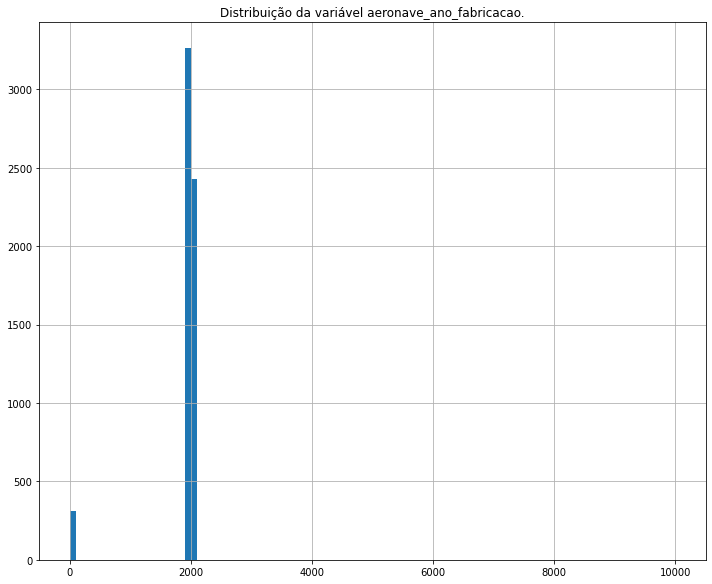

In [421]:
# aeronave[aeronave.aeronave_ano_fabricacao > 0].idade.hist() # remoção de outliers
# sns.displot(aeronave, x="aeronave_ano_fabricacao",)
plt.figure(figsize=(10,8))
aeronave.aeronave_ano_fabricacao.hist(bins=100)
plt.tight_layout()
plt.title("Distribuição da variável aeronave_ano_fabricacao.")
plt.savefig("data/images/q02_irr.png",bbox_inches='tight')

## Qual idade das aeronaves acidentadas em anos?

<Figure size 720x576 with 0 Axes>

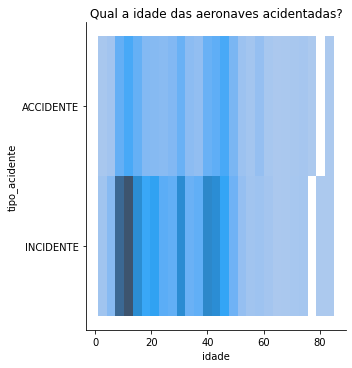

In [422]:
# aeronave[aeronave.aeronave_ano_fabricacao > 0].idade.hist() # remoção de outliers

plt.figure(figsize=(10,8))
sns.displot(aeronave[(aeronave.aeronave_ano_fabricacao > 0) & (aeronave.aeronave_ano_fabricacao < 3000)], x="idade",  y ='tipo_acidente')
plt.tight_layout()
plt.title("Qual a idade das aeronaves acidentadas?")
plt.savefig("data/images/q02_class.png",bbox_inches='tight')

<Figure size 720x576 with 0 Axes>

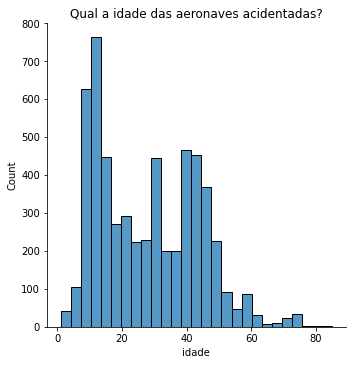

In [423]:
# aeronave[aeronave.aeronave_ano_fabricacao > 0].idade.hist() # remoção de outliers
plt.figure(figsize=(10,8))
sns.displot(aeronave[(aeronave.aeronave_ano_fabricacao > 0) & (aeronave.aeronave_ano_fabricacao < 3000)], x="idade")

plt.title("Qual a idade das aeronaves acidentadas?")
plt.savefig("data/images/q02.png",bbox_inches='tight')

## Qual tipos de aeronaves acidentadas por tipo de operação?

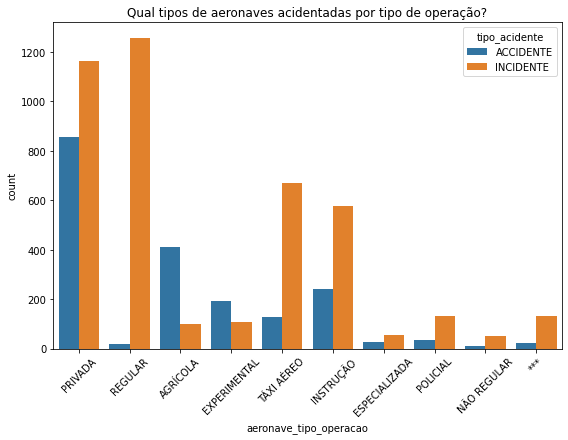

In [424]:
# aeronave.aeronave_pais_fabricante.value_counts().plot.bar()
plt.figure(figsize=(8,6))
chart = sns.countplot(x ='aeronave_tipo_operacao', data = aeronave, hue='tipo_acidente')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# chart.set_yscale("log")
plt.tight_layout()
plt.title("Qual tipos de aeronaves acidentadas por tipo de operação?")
plt.savefig("data/images/q03.png",bbox_inches='tight')

## Quais os níveis de danos para aeronaves acidentadas?

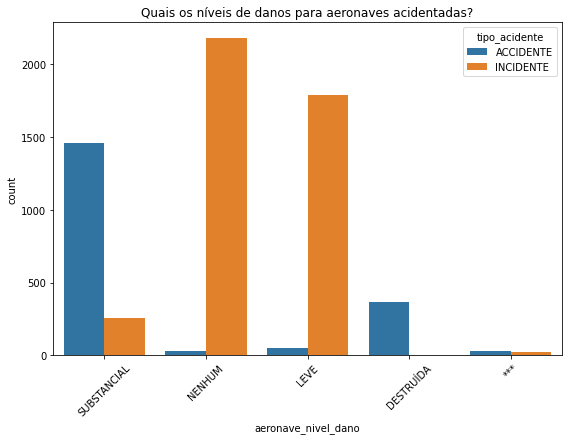

In [425]:
# aeronave.aeronave_pais_fabricante.value_counts().plot.bar()
plt.figure(figsize=(8,6))
chart = sns.countplot(x ='aeronave_nivel_dano', data = aeronave, hue='tipo_acidente')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# chart.set_yscale("log")
plt.tight_layout()
plt.title("Quais os níveis de danos para aeronaves acidentadas?")
plt.savefig("data/images/q04.png",bbox_inches='tight')

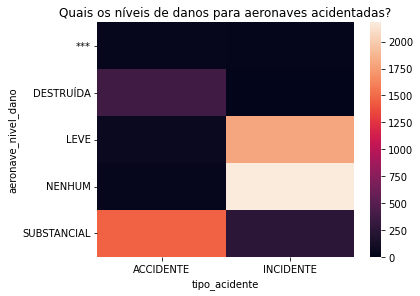

In [426]:
sns.heatmap(pd.crosstab(index=aeronave['aeronave_nivel_dano'], columns=aeronave['tipo_acidente']))

plt.tight_layout()
plt.title("Quais os níveis de danos para aeronaves acidentadas?")
plt.savefig("data/images/q04.png", bbox_inches='tight')

# Fatores de contribuição

In [427]:
fator_contrib.head(3)

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area,tipo_acidente
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,ACCIDENTE
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,ACCIDENTE
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,ACCIDENTE


## Top 15 fatores que causaram ocorrências.

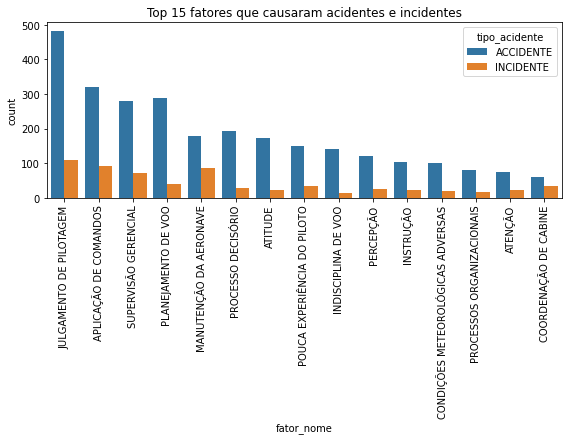

In [448]:
# aeronave.aeronave_pais_fabricante.value_counts().plot.bar()
plt.figure(figsize=(8,6))
chart = sns.countplot(x ='fator_nome', data = fator_contrib, order=fator_contrib.fator_nome.value_counts().iloc[:15].index, hue='tipo_acidente')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# chart.set_yscale("log")
plt.tight_layout()

plt.title("Top 15 fatores que causaram acidentes e incidentes")
plt.savefig("data/images/q05.png",bbox_inches='tight')

## Aspecto de fatores e tipo de acidentes

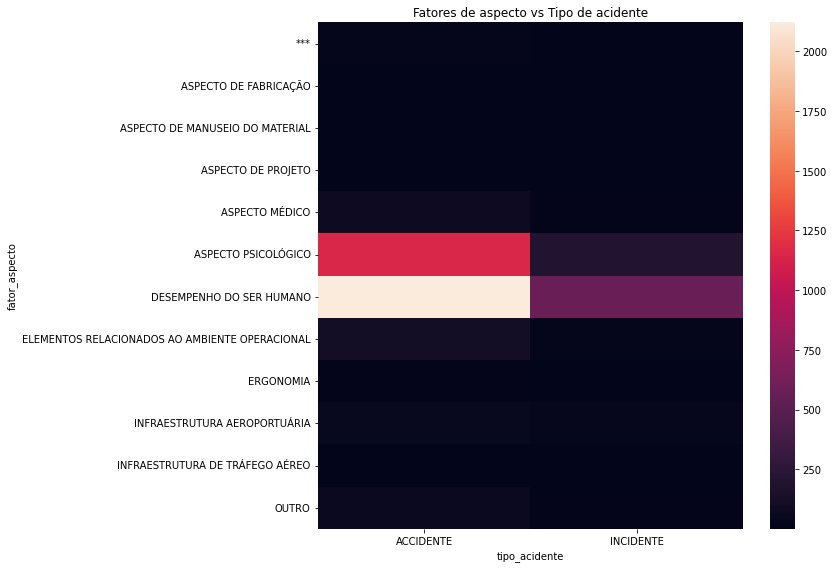

In [476]:

plt.figure(figsize=(12,8))

sns.heatmap(pd.crosstab(index=fator_contrib['fator_aspecto'], columns=fator_contrib['tipo_acidente']))
plt.title("Fatores de aspecto vs Tipo de acidente")
plt.tight_layout()
plt.savefig("data/images/q06.png",bbox_inches='tight')
# plt.show()

## Area do fator e tipo de acidentes

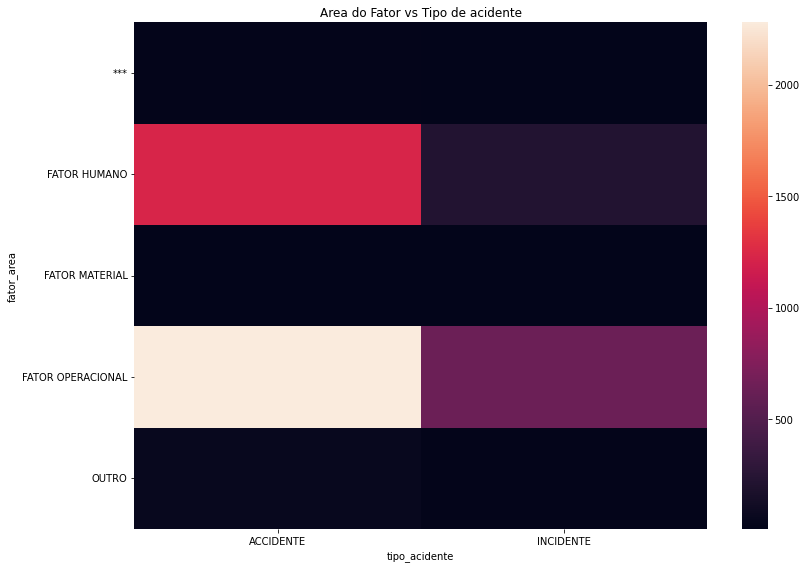

In [479]:

plt.figure(figsize=(12,8))

sns.heatmap(pd.crosstab(index=fator_contrib['fator_area'], columns=fator_contrib['tipo_acidente']))
plt.title("Area do Fator vs Tipo de acidente")
plt.tight_layout()
plt.savefig("data/images/q07.png",bbox_inches='tight')

# Ocorrência

In [451]:
ocorrencia

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,ocorrencia_hora,ocorrencia_year_month
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,03/01/2010,12:00:00,2010-03-01
1,40349,40349,40349,40349,40349,INCIDENTE,None,None,BELÉM,PA,03/01/2010,11:05:00,2010-03-01
2,40351,40351,40351,40351,40351,INCIDENTE,None,None,RIO DE JANEIRO,RJ,03/01/2010,03:00:00,2010-03-01
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,04/01/2010,17:30:00,2010-04-01
4,40324,40324,40324,40324,40324,INCIDENTE,None,None,PELOTAS,RS,05/01/2010,19:25:00,2010-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,80245,80245,80245,80245,80245,INCIDENTE,-8.12638,-34.92277,RECIFE,PE,15/08/2021,15:05:00,2021-08-01
6110,80247,80247,80247,80247,80247,INCIDENTE,-8.713611111111,-63.90277777777,PORTO VELHO,RO,16/08/2021,02:30:00,2021-08-01
6111,80251,80251,80251,80251,80251,INCIDENTE,-1.384722222222,-48.47888888888,BELÉM,PA,17/08/2021,15:45:00,2021-08-01
6112,80257,80257,80257,80257,80257,ACIDENTE,-15.430833,-54.699722,DOM AQUINO,MT,18/08/2021,16:00:00,2021-08-01


In [452]:
ocorrencia['ocorrencia_year_month'] = pd.to_datetime(pd.to_datetime(ocorrencia.ocorrencia_dia).apply(lambda x: x.strftime("%m/%Y")))
ocorrencia.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,ocorrencia_hora,ocorrencia_year_month
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,03/01/2010,12:00:00,2010-03-01
1,40349,40349,40349,40349,40349,INCIDENTE,None,None,BELÉM,PA,03/01/2010,11:05:00,2010-03-01
2,40351,40351,40351,40351,40351,INCIDENTE,None,None,RIO DE JANEIRO,RJ,03/01/2010,03:00:00,2010-03-01
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,04/01/2010,17:30:00,2010-04-01
4,40324,40324,40324,40324,40324,INCIDENTE,None,None,PELOTAS,RS,05/01/2010,19:25:00,2010-05-01


## Ocorrências pelo tempo

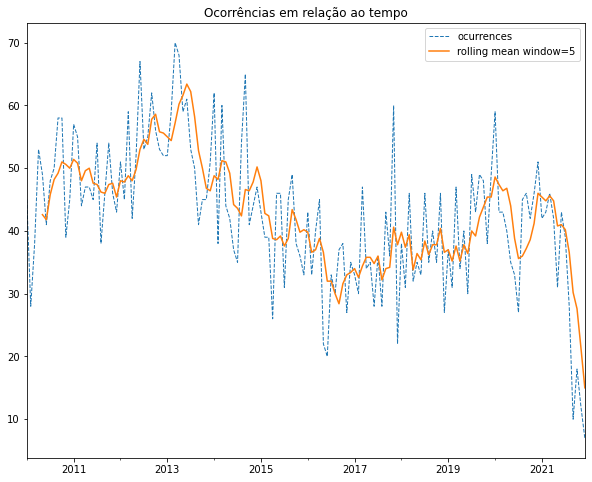

In [481]:
v =  ocorrencia.ocorrencia_year_month.value_counts().sort_index(ascending=True)

v.plot(figsize=(10,8), label='ocurrences', linestyle='--', linewidth=1)
v.rolling(window=5,center=False).mean().plot(label='rolling mean window=5')
plt.title("Ocorrências em relação ao tempo")
plt.legend()
plt.savefig("data/images/q08.png",bbox_inches='tight')


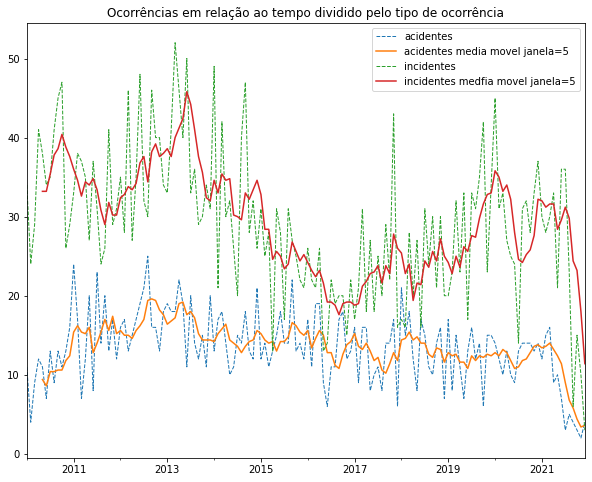

In [480]:
v =  ocorrencia[ocorrencia.ocorrencia_classificacao == 'ACIDENTE'].ocorrencia_year_month.value_counts().sort_index(ascending=True)

v.plot(figsize=(10,8), label='acidentes', linestyle='--', linewidth=1)
v.rolling(window=5,center=False).mean().plot(label='acidentes media movel janela=5')

v =  ocorrencia[ocorrencia.ocorrencia_classificacao != 'ACIDENTE'].ocorrencia_year_month.value_counts().sort_index(ascending=True)
v.plot(figsize=(10,8), label='incidentes', linestyle='--', linewidth=1)
v.rolling(window=5,center=False).mean().plot(label='incidentes medfia movel janela=5')

plt.title("Ocorrências em relação ao tempo dividido pelo tipo de ocorrência")

plt.legend()
plt.savefig("data/images/q09.png",bbox_inches='tight')


/home/kevintakano/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kevintakano/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/kevintakano/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kevintak

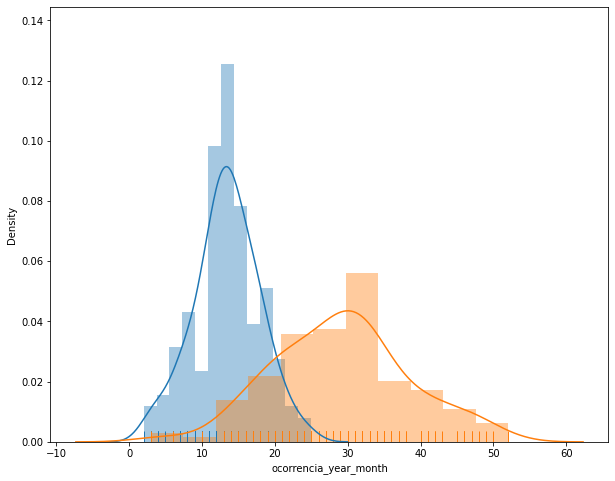

In [455]:
dist1 = ocorrencia[ocorrencia.ocorrencia_classificacao == 'ACIDENTE'].ocorrencia_year_month.value_counts()
dist2 = ocorrencia[ocorrencia.ocorrencia_classificacao != 'ACIDENTE'].ocorrencia_year_month.value_counts()
plt.figure(figsize=(10,8))
sns.distplot(dist1, hist=True, rug=True);
sns.distplot(dist2, hist=True, rug=True);
plt.savefig("data/images/dists.png",bbox_inches='tight')

In [456]:
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = scipy.stats.mannwhitneyu(distribution_1, distribution_2)
    return u_statistic, p_value

mann_whitney_u_test(list(dist1), list(dist2))

(1222.0, 2.352990826097736e-38)

- a hipótese nula pode ser rejeitada, isto é, os dois grupos são diferentes.

## Ocorrências por localização

In [457]:
ocorrencia.head(3)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,ocorrencia_hora,ocorrencia_year_month
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,03/01/2010,12:00:00,2010-03-01
1,40349,40349,40349,40349,40349,INCIDENTE,None,None,BELÉM,PA,03/01/2010,11:05:00,2010-03-01
2,40351,40351,40351,40351,40351,INCIDENTE,None,None,RIO DE JANEIRO,RJ,03/01/2010,03:00:00,2010-03-01


In [458]:
ocorrencia_filtered = ocorrencia.dropna()[['ocorrencia_classificacao','ocorrencia_latitude','ocorrencia_longitude']]
print(ocorrencia_filtered.shape)

def filter_invalid(row):
    return not '*' in row or '°' in row
    
# ocorrencia_filtered = ocorrencia_filtered[ocorrencia_filtered.ocorrencia_latitude.apply(filter_invalid)]
print(ocorrencia_filtered.shape)

(4551, 3)
(4551, 3)


In [459]:
ocorrencia_filtered['ocorrencia_latitude'] = ocorrencia_filtered['ocorrencia_latitude'].str.replace(',','.').str.extract(r'(-?\d+.\d+)').astype('float')
ocorrencia_filtered['ocorrencia_longitude'] = ocorrencia_filtered['ocorrencia_longitude'].str.replace(',','.').str.extract(r'(-?\d+.\d+)').astype('float')

In [460]:
ocorrencia_filtered = ocorrencia_filtered[(ocorrencia_filtered.ocorrencia_latitude >= -90) & (ocorrencia_filtered.ocorrencia_latitude <= 90)]
ocorrencia_filtered = ocorrencia_filtered[(ocorrencia_filtered.ocorrencia_longitude >= -180) & (ocorrencia_filtered.ocorrencia_longitude <= 180)]

In [461]:
ocorrencia_filtered = ocorrencia_filtered.dropna(how='any')


In [462]:
ocorrencia_filtered.head()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude
3,ACIDENTE,-13.106667,-55.993056
7,INCIDENTE GRAVE,-6.531944,-64.380556
8,INCIDENTE GRAVE,-15.240278,-59.354167
11,ACIDENTE,-23.506944,-46.634167
13,ACIDENTE,-15.558889,-54.304722


In [463]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
print(ocorrencia_filtered.shape)
gdf = geopandas.GeoDataFrame(
    ocorrencia_filtered, geometry=geopandas.points_from_xy(ocorrencia_filtered.ocorrencia_longitude, ocorrencia_filtered.ocorrencia_latitude))

(3244, 3)


In [464]:
gdf.head()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,geometry
3,ACIDENTE,-13.106667,-55.993056,POINT (-55.99306 -13.10667)
7,INCIDENTE GRAVE,-6.531944,-64.380556,POINT (-64.38056 -6.53194)
8,INCIDENTE GRAVE,-15.240278,-59.354167,POINT (-59.35417 -15.24028)
11,ACIDENTE,-23.506944,-46.634167,POINT (-46.63417 -23.50694)
13,ACIDENTE,-15.558889,-54.304722,POINT (-54.30472 -15.55889)


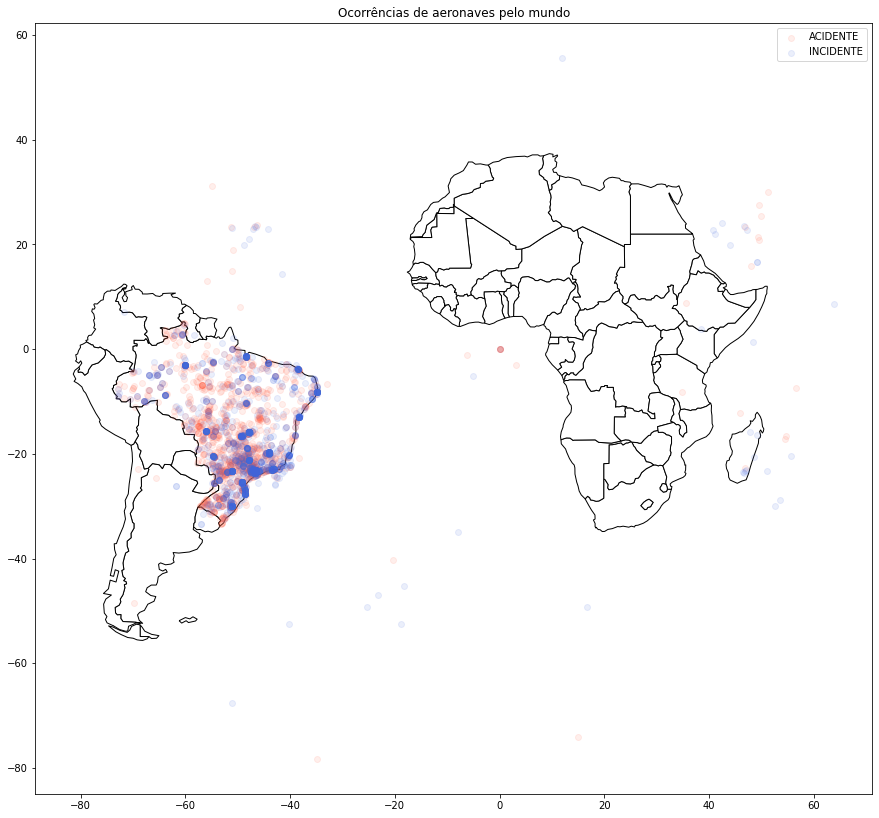

In [465]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(ocorrencia_filtered['ocorrencia_longitude'], ocorrencia_filtered['ocorrencia_latitude'])]
gdf = GeoDataFrame(ocorrencia_filtered, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# ax = world.plot(
    # color='white', edgecolor='black', figsize=(20,20))

ax = world[(world.continent.isin(["South America","Africa"]))]\
.plot(color='white', edgecolor='black', figsize=(15,15))

# We can now plot our ``GeoDataFrame``.
gdf[gdf.ocorrencia_classificacao == 'ACIDENTE'].plot(ax=ax, color='tomato',alpha=0.1, label="ACIDENTE")
gdf[gdf.ocorrencia_classificacao != 'ACIDENTE'].plot(ax=ax, color='royalblue',alpha=0.1, label="INCIDENTE")
plt.legend()
plt.title("Ocorrências de aeronaves pelo mundo")
plt.savefig("data/images/q10.png",bbox_inches='tight')
plt.show()

# Tipos de ocorrências

In [466]:
ocorrencia_tipo.head(3)

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,tipo_acidente
0,39115,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL,ACCIDENTE
1,39155,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,INCIDENTE
2,39156,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI,INCIDENTE


## Top 15 tipos de ocorrências

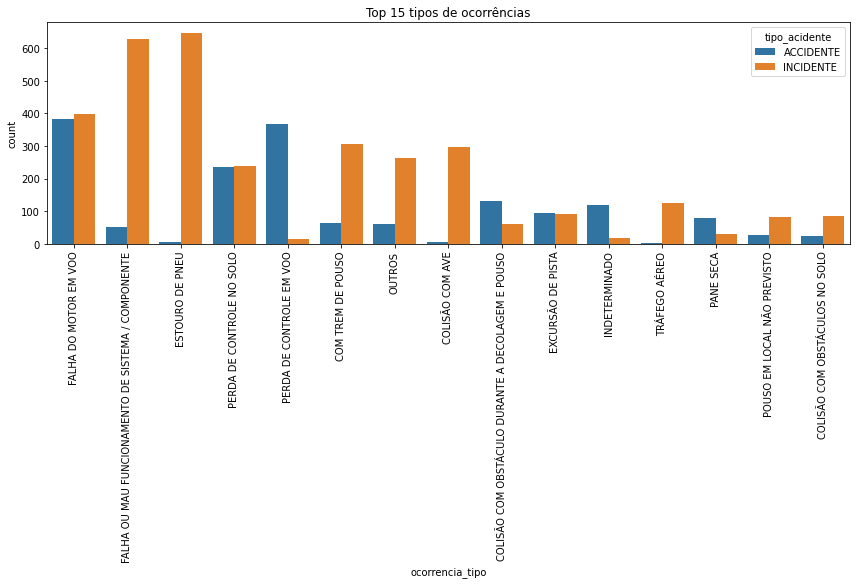

In [467]:
# aeronave.aeronave_pais_fabricante.value_counts().plot.bar()
plt.figure(figsize=(12,8))
chart = sns.countplot(x ='ocorrencia_tipo', data = ocorrencia_tipo, order=ocorrencia_tipo.ocorrencia_tipo.value_counts().iloc[:15].index, hue='tipo_acidente')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# chart.set_yscale("log")
# plt.figure(figsize=(12,8))
plt.tight_layout()

plt.title("Top 15 tipos de ocorrências")
plt.savefig("data/images/q11.png",bbox_inches='tight')